#**Anime Rating Analysis & Recommender System**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pprint import pprint
from tabulate import tabulate
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

#**Business Understanding**
##**Tujuan Bisnis**
Tujuan proyek ini adalah untuk menganalisis data rating anime dan mengembangkan sistem rekomendasi untuk memberikan rekomendasi yang baik untuk pengguna berdasarkan kesukaan mereka. Dengan demikian, diharapkan dapat meningkatkan pengalaman pengguna dalam menemukan anime yang sesuai dengan selera mereka.


##**Assess Situation**
Situasi bisnis yang mendasari proyek ini adalah:

1. Kebutuhan akan sistem yang dapat membantu memberikan rekomendasi yang sesuai dengan selera mereka
2. Meningkatkan interaksi pengguna dengan platform anime.
3. Kurangnya pemahaman selera unik setiap pengguna, maka terdapat keaadan yang dimana rekomendasinya kurang tepat


##**Data Mining Goals**
Tujuan dari analisis data pada dataset ini adalah :


1. Mengembangkan sistem rekomendasi yang dapat memberikan rekomendasi anime yang sesuai dengan selera pengguna.
2.   Memprediksi rating anime berdasarkan faktor-faktor tertentu
3. mengidentifikasi tren dan pola dalam data rating


##**Projek Plan**
Pertama-tama dimulai dengan pengumpulan data rating anime dari sumber yang tersedia. Selanjutnya, data akan dijelaskan karakteristiknya dan pola-pola yang menarik untuk di itentifikasi. kemudian mendeskripsikan data yang akan di identifikasi seperti contoh "ID anime, nama, genre, jenis, episode, rating", lalu menilai kualitas data dan masalah data yang akan diidentifikasi.

#**Data Understanding**

##**Collect Initial Data**

In [ ]:
data = pd.read_csv("/anime.csv")

In [ ]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


##**Describe Data**

###Informasi Dasar

In [ ]:
print("Baris :",data.shape[0])
print("Kolom :",data.shape[1])

Baris : 12294
Kolom : 7


Pada Dataset yang tersedia total Baris adalah 12294 dengan total kolom 7

###informasi Lanjut

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


pada index 0 terdapat kolom "anime_id" Kolom ini berisi ID unik untuk setiap anime dalam dataset. Jumlahnya 12294 dan memiliki tipe data int64.

pada index 1 terdapat kolom "nama" Kolom ini berisi nama anime. Setiap entri adalah string (objek) dan tidak ada nilai yang hilang (non-null) di kolom ini.

pada index 2 terdapat kolom "genre" Kolom ini berisi genre-genre dari setiap anime. Ada 12232 entri non-null dalam kolom ini. Tipe data kolom ini adalah objek (string).

pada index 3 terdapat kolom "type" Kolom ini mewakili jenis dari anime, seperti TV, OVA, Movie, dll. Ada 12269 entri non-null dalam kolom ini. Tipe datanya adalah objek (string).

pada index 4 terdapat kolom "episodes" Kolom ini berisi informasi tentang jumlah episode dari setiap anime. Semua entri adalah string. Jumlah total entri sesuai dengan jumlah baris dalam dataset (12294).

pada index 5 terdapat kolom "rating" Kolom ini berisi rating dari setiap anime. Ada 12064 entri non-null dalam kolom ini. Tipe data kolom ini adalah float64.

pada index 6 terdapat kolom "members" Kolom ini berisi jumlah anggota yang telah memberikan peringkat terhadap anime tersebut. Semua entri adalah bilangan bulat (int64)

Jadi, dataset ini berisi informasi tentang anime, termasuk ID, nama, genre, jenis, jumlah episode, rating, dan jumlah anggota yang memberikan peringkat. Beberapa kolom memiliki (missing values), seperti genre, type, dan rating

###Informasi Statistik Deskriptif

In [ ]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


pada kolom output "index" diatas merupakan perhitungan yang meliputi, count,mean,sdt,min,25%,50%,75%, dan Max

pada kolom output "anime_id" Kolom ini berisi ID unik untuk setiap anime dalam dataset. Jumlah entri dalam kolom ini adalah 12294.0, Rata-rata entri dalam kolom ini adalah 14058.221652838783,Nilai minimumnya adalah 1.0 dan nilai maksimumnya adalah 34527.0  Standar deviasi dari kolom ini adalah 11455.29, menunjukkan sebaran yang cukup besar dari nilai-nilai anime_id. Nilai-nilai ini juga menunjukkan bahwa data anime_id tidak diurutkan secara berurutan.

rating: Kolom ini berisi rating untuk setiap anime. Jumlah entri yang tidak null dalam kolom ini adalah 12064. Nilai rata-ratanya adalah 6.47 dengan standar deviasi sekitar 1.03, menunjukkan variasi yang cukup rendah di antara nilai-nilai rating. Rating terendah adalah 1.67 dan rating tertinggi adalah 10.0.

members: Kolom ini berisi jumlah anggota yang memberikan peringkat terhadap anime tersebut. Jumlah entri dalam kolom ini adalah 12294. Jumlah anggota terendah yang memberikan peringkat adalah 5 dan jumlah anggota tertinggi yang memberikan peringkat adalah 1013917. Standar deviasi dari kolom ini adalah 54820.68, menunjukkan sebaran yang cukup besar dari jumlah anggota yang memberikan peringkat.

##**Exploratoory Data Analysis**

###Distribusi Variabel Tunggal

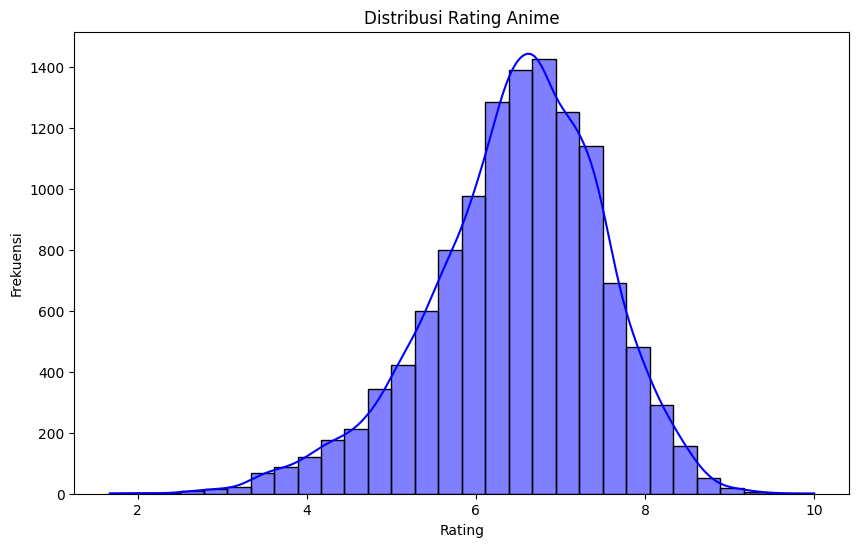

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=30, kde=True, color='blue')
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

####Histogram Distribusi Rating Anime:


Penjelasan: Histogram menunjukkan distribusi rating anime dalam dataset. yang dimana frekuensi dimulai dari 0-1400 dan rating dimulai dari 0-10


####**Interpretasi:**

*   Distribusi rating anime pada dataset ini tidak normal, dengan kemiringan ke kiri yang menunjukkan bahwa mayoritas anime memiliki rating yang lebih rendah.
*   Puncak distribusi berada di sekitar rating 6-7, menunjukkan bahwa banyak anime yang memiliki kualitas rata-rata.
* Ada beberapa anime yang memiliki rating sangat tinggi (9-10) dan juga sangat rendah (1-2).

*   Distribusi rating anime pada dataset ini menunjukkan bahwa Penonton anime memiliki selera yang beragam, dengan preferensi yang berbeda terhadap genre, gaya animasi, dan cerita.
* ada banyak anime yang memiliki kualitas yang kurang baik bagi beberapa preferensi tertentu
*   Ada banyak juga anime yang memiliki kualitas yang baik dan menarik bagi berbagai kalangan
* Rating anime tidak selalu mencerminkan kualitasnya, sehingga penting untuk melihat faktor lain seperti genre, cerita, dan karakter








###Hubungan Antar Dua Variabel

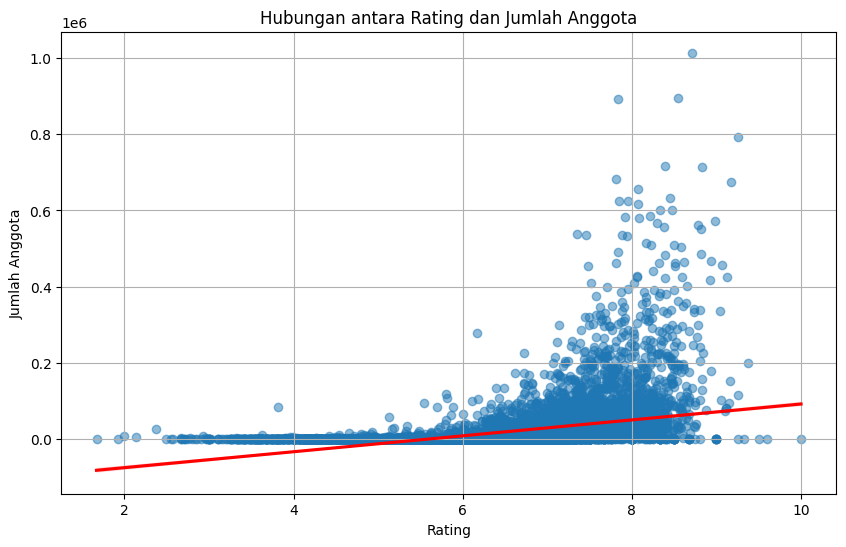

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='rating', y='members', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hubungan antara Rating dan Jumlah Anggota')
plt.xlabel('Rating')
plt.ylabel('Jumlah Anggota')
plt.grid(True)
plt.show()


###Scatter plot untuk melihat hubungan antara rating dan jumlah anggota

####**Interpretasi**


* Rating dan jumlah anggota saling terkait. Anime dengan rating tinggi cenderung memiliki lebih banyak anggota, dan komunitas anime dengan banyak anggota cenderung memiliki rating tinggi.
* Rating dapat menjadi indikator popularitas dan kualitas anime, dan komunitas anime yang aktif dan memiliki banyak konten menarik dapat menarik lebih banyak anggota.
* Anime dengan rating tinggi lebih populer dan menarik minat lebih banyak orang untuk bergabung dengan komunitasnya.
* Rating tinggi dapat menjadi indikator kualitas anime, sehingga orang lebih tertarik untuk menonton dan bergabung dengan komunitasnya.
* Komunitas anime dengan rating tinggi biasanya lebih aktif dan memiliki lebih banyak konten menarik, sehingga menarik lebih banyak anggota.





###Komposisi Variabel

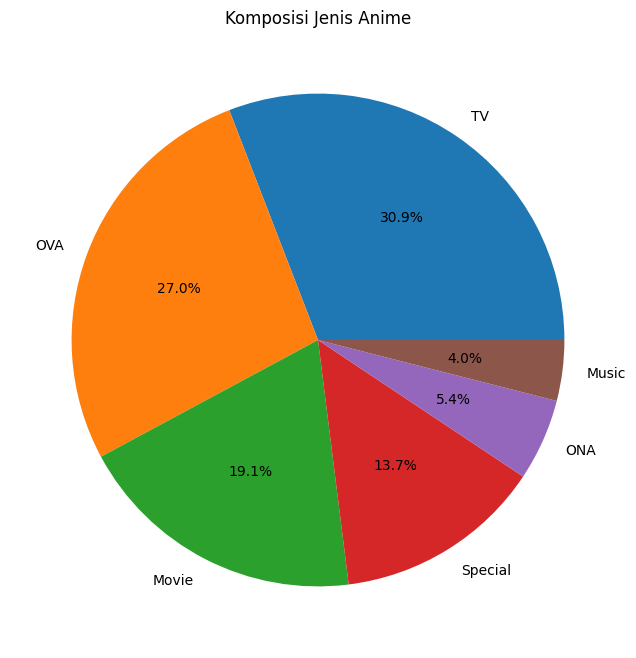

In [ ]:
plt.figure(figsize=(8, 8))
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Komposisi Jenis Anime')
plt.ylabel('')
plt.show()

###Pie chart untuk melihat komposisi jenis anime

####**Interpretasi**



*   TV: 30.9%
*   OVA: 27.0%
* Movie:
* ONA: 13.7%
* Music: 4.0%
* Special: 5.4%
* Terdapat berbagai jenis anime yang tersedia, dengan anime TV sebagai format yang paling populer.
* Setiap jenis anime memiliki karakteristik dan target penontonnya sendiri.
* Penonton anime dapat memilih jenis anime yang sesuai dengan selera mereka.





###Perbandingan Antar Kategori yang Berbeda

<ipython-input-74-3c7397900dd0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='rating', data=data, hue='type', palette='Set2', ci=None, dodge=False)


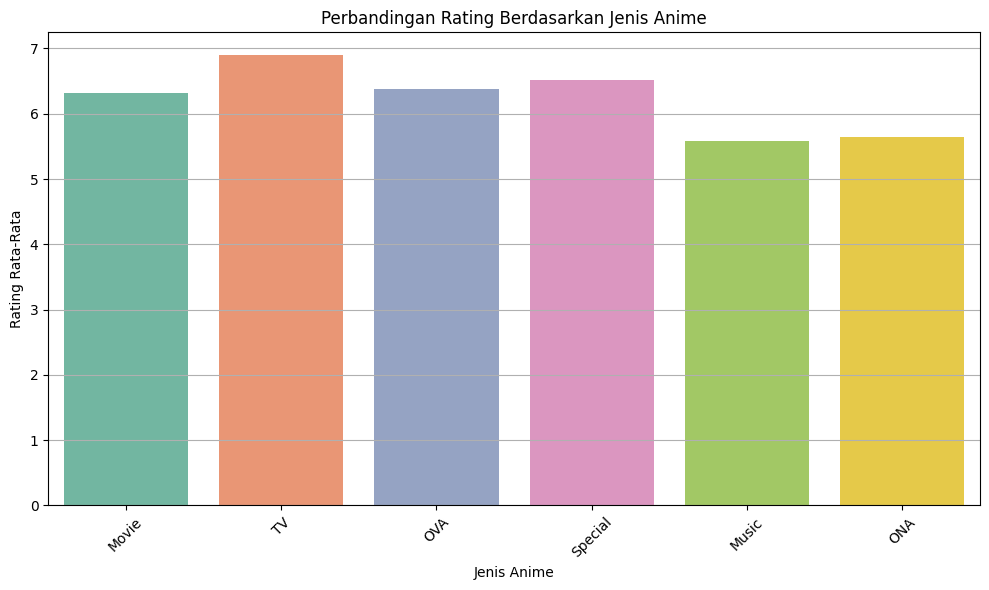

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='rating', data=data, hue='type', palette='Set2', ci=None, dodge=False)
plt.title('Perbandingan Rating Berdasarkan Jenis Anime')
plt.xlabel('Jenis Anime')
plt.ylabel('Rating Rata-Rata')
plt.xticks(rotation=45)
plt.legend([], frameon=False)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###Barchart untuk melihat perbandingan rating berdasarkan jenis anime

####**Interpretasi**


*   TV memiliki rating rata-rata tertinggi yaitu (6.8)
*   Movie dan OVA meiliki rata-rata yang sama yaitu (6.4)
* Music dan ONA memiliki rata-rata yang sama yaitu (5.6)





##**Verify Data Quality**

### Missing Values

Mengecek apakah pada data yang digunakan terdapat missing value

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


* pada output dataset diatas memiliki beberapa kolom yang nilai nya kosong, diantaranya genre sebanyak 62, type sebanyak 25, dan rating sebanyak 230
*Rating merupakan kolom terbanyak yang nilainya kosong

### Outliers Values

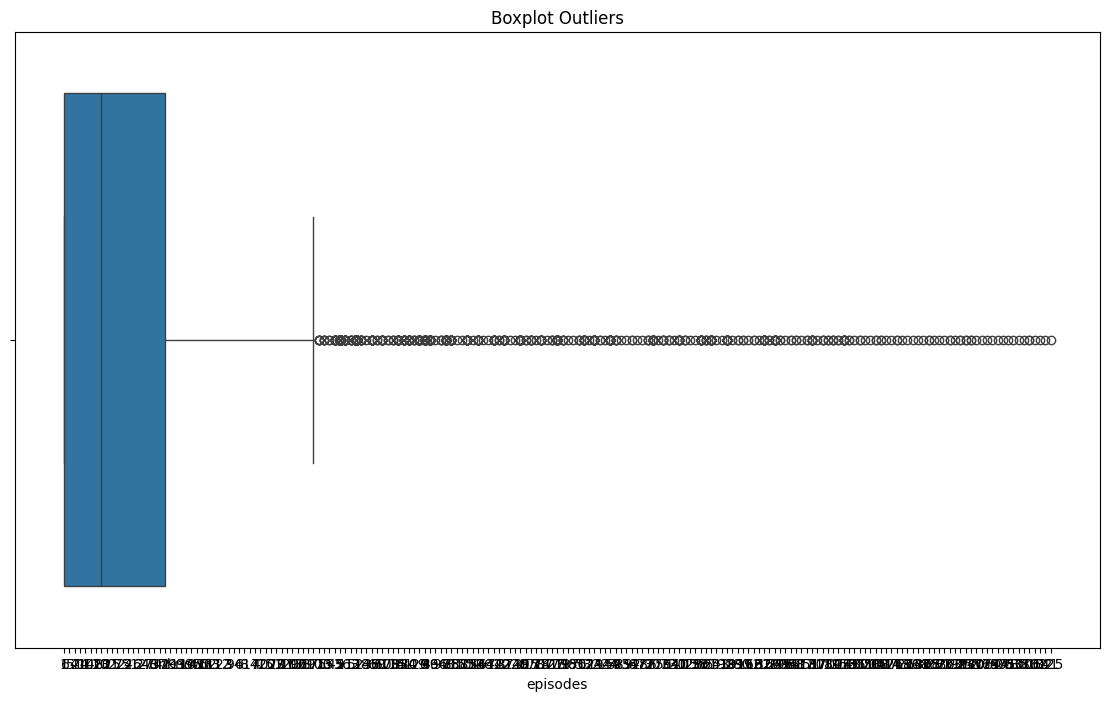

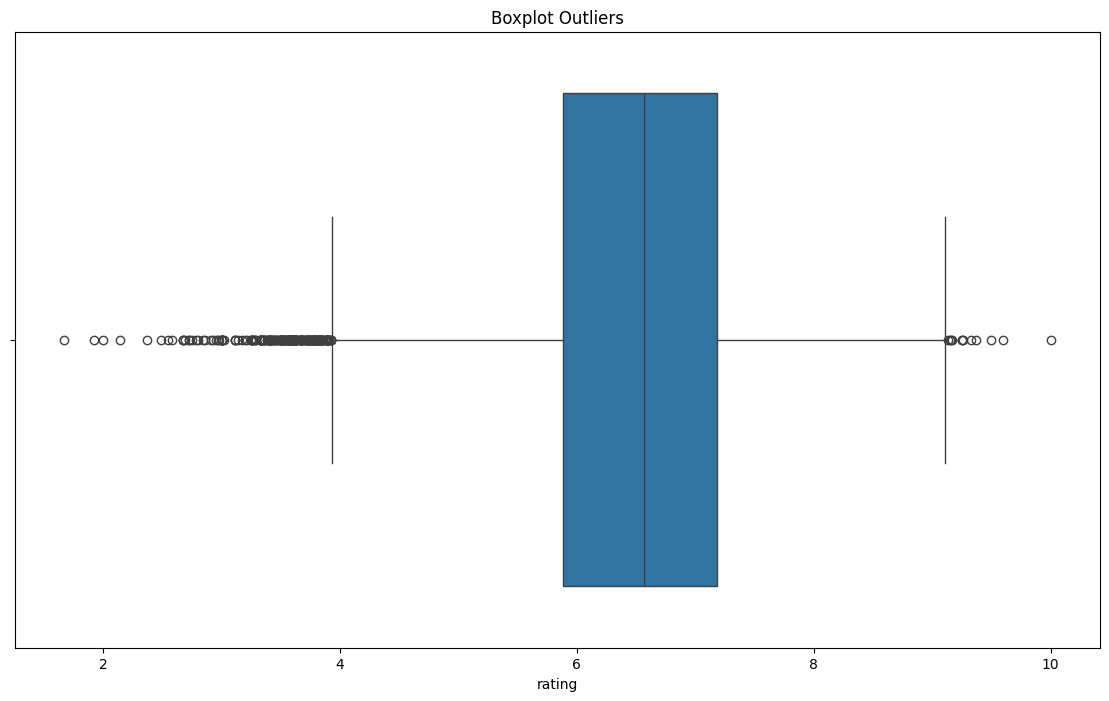

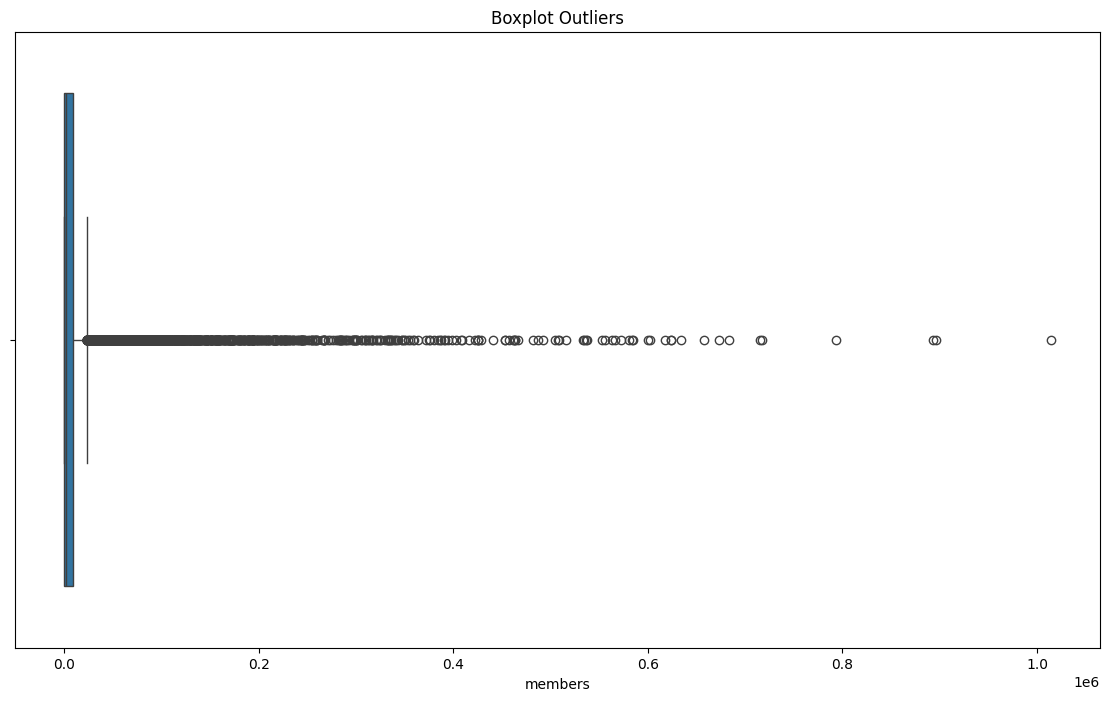

In [ ]:
columns = [ 'episodes', 'rating', 'members']
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=data[col])
  plt.title("Boxplot Outliers")
  plt.show()

Visualisasi diatas menampilkan boxplot untuk setiap fitur 'episodes', 'rating', dan 'members'. Boxplot akan menunjukkan bahwa ada outliers pada fitur tertentu. Dengan demikian, kita dapat dengan jelas melihat pola dan variasi data dalam setiap fitur secara terpisah, membantu dalam pemahaman karakteristik dataset anime.

### Duplicated Values

In [ ]:
duplicate_values = data["anime_id"].duplicated().sum()
print(f"Kolom anime_id memiliki duplikat value sebanyak: {duplicate_values}")

Kolom anime_id memiliki duplikat value sebanyak: 0


Menandakan bahwa tidak ada anime yang dobel atau terduplikat

#**Data Preparation**

## Data Cleaning

### Handling Missing Values

####Pengecekkan Missing Values

In [ ]:
print((data.isna().sum() / len(data)) * 100)

anime_id    0.000000
name        0.000000
genre       0.504311
type        0.203351
episodes    0.000000
rating      1.870831
members     0.000000
dtype: float64


Pada output dataset ini beberapa kolom memiliki missing values diantara nya:



*   Genre dengan presntase 0.504311
*   Type dengan presentase 0.203351
* Rating dengan presentase 1.870831

Dikarenakan di antara 3 kolom ini tidak ada missing values yang memiliki presentase nya di atas 70% maka tidak ada kolom yang akan di hapus, tetapi ketiga kolom ini akan di imputasi



#### Imputasi Missing Values

In [ ]:
genre_mode = data['genre'].mode()[0]
genre_mode

'Hentai'

In [ ]:
data['genre'] = data['genre'].fillna(genre_mode)

In [ ]:
type_mode = data['type'].mode()[0]
type_mode

'TV'

Isi kolom Genre dan Type menggunakan modus karena berupa kolom kategorikal. Karena Nilai Modus merupakan nilai yang paling sering muncul dalam suatu himpunan data, jadi ini lebih cocok untuk mengisi nilai yang hilang dalam kolom kategorikal karena dapat mempertahankan distribusi kategori yang ada

In [ ]:
data['type'] = data['type'].fillna(type_mode)

In [ ]:
data['rating'].dropna().describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

Isi missing values pada kolom rating menggunakan median agar data yang dihasilkan lebih stabil dan mencegah adanya outliers

In [ ]:
data['rating'].fillna(data['rating'].median(), inplace=True)

Selanjutnya kita cek ulang apakah masih ada missing value pada kolom genre, type, dan rating

In [ ]:
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Bisa kita lihat pada output diatas bahwa tidak ada lagi nilai yang hilang dalam dataset setelah proses imputasi. Hal ini menunjukkan bahwa penggunaan modus dan median berhasil dalam mengisi nilai yang hilang sehingga dataset kini lengkap dan siap untuk analisis lebih lanjut

## Data Reduction

####Mengurangi Fitur-Fitur yang Kurang Relevan

Disini kita akan mengurangi kolom atau fitur yang akan digunakan, kita akan melakukan clustering hanya berdasarkan genre, type, dan rating saja maka kita tidak menggunakan kolom name dan members

In [ ]:
new_data = data[[ 'anime_id', 'genre', 'type', 'rating']]

In [ ]:
new_data

,anime_id,genre,type,rating
0,32281,"Drama, Romance, School, Supernatural",Movie,9.37
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25
3,9253,"Sci-Fi, Thriller",TV,9.17
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16
...,...,...,...,...
12289,9316,Hentai,OVA,4.15
12290,5543,Hentai,OVA,4.28
12291,5621,Hentai,OVA,4.88
12292,6133,Hentai,OVA,4.98


## Data Transformation

#### Penanganan Duplicated Values

Mengecek terlebih dahulu apakah ada baris yang terduplikat atau tidak

In [ ]:
new_data[new_data.duplicated()]

,anime_id,genre,type,rating


Bisa kita lihat pada output diatas ternayata tidak ada data yang terduplikat dan sudah aman untuk diolah

#### Penanganan Outliers

In [ ]:
results = []

cols = new_data.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = new_data[col].quantile(0.25)
  q3 = new_data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(new_data))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_new_data = pd.DataFrame(results)
results_new_data.set_index('Kolom', inplace=True)
results_new_data = results_new_data.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_new_data)

Kolom,Persentase Outliers
anime_id,0.000000
rating,2.033512


Bisa kita lihat terdapat outliers pada kolom rating

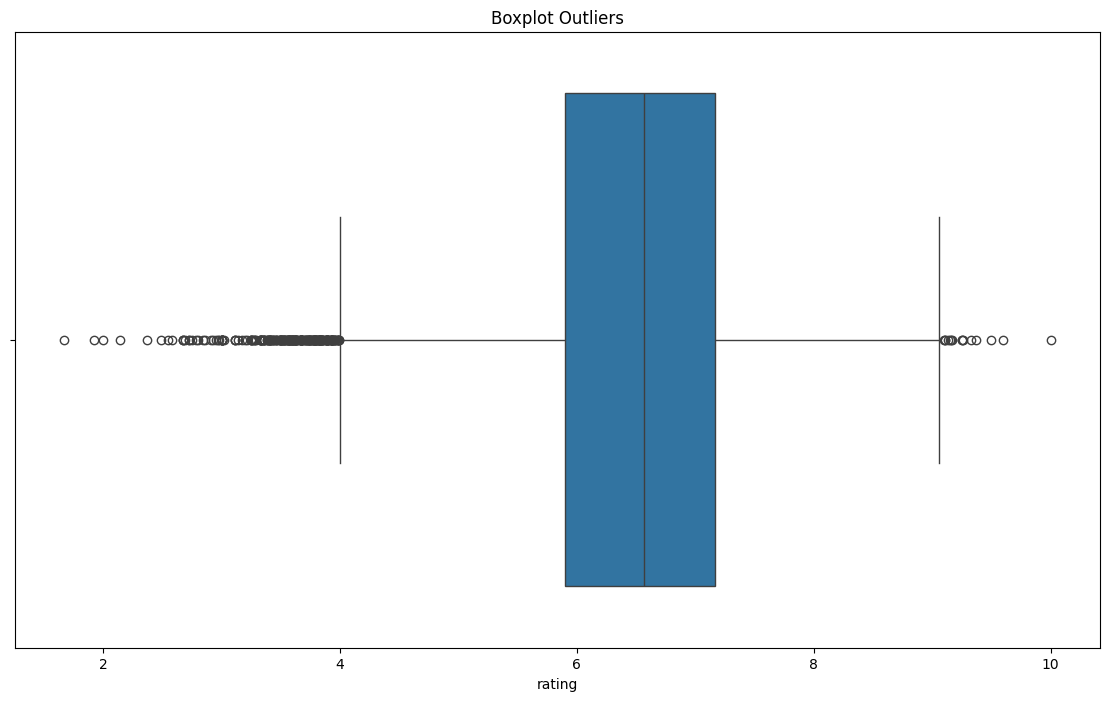

In [ ]:
columns = ["rating"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=new_data[col])
  plt.title("Boxplot Outliers")
  plt.show()

Visualisasi diatas ini untuk dapat lebih memahami terkait nilai outliers yang ada pada data, bisa dilihat terdapat beberapa titik yang keluar dari rentang normalnya

#####Hapus outliers pada kolom rating

Selanjutnya pada tahap ini kita mengahpus nilai outliers yang ada pada kolom rating tadi

In [ ]:
Q1 = new_data['rating'].quantile(0.25)
Q3 = new_data['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_data = new_data[(new_data['rating'] >= lower_bound) & (new_data['rating'] <= upper_bound)]

In [ ]:
results = []

cols = new_data.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = new_data[col].quantile(0.25)
  q3 = new_data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(new_data))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_new_data = pd.DataFrame(results)
results_new_data.set_index('Kolom', inplace=True)
results_new_data = results_new_data.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_new_data)

Kolom,Persentase Outliers
anime_id,0.000000
rating,0.523082


Bisa kita lihat sudah tidak ada outliers sehingga bisa dilanjutkan ke tahap selanjutnya

## Encode

Melakukan encoding pada kolom kategorikal yakni genre dan type agar menjadi nilai numeric

In [ ]:
genres = new_data['genre'].str.get_dummies(sep=', ')
types = pd.get_dummies(new_data['type'])

Gabungkan hasil encoding kolom genres dan type dengan kolom anime_id dan ratings

In [ ]:
data_encoded = pd.concat([new_data['anime_id'], genres, types, new_data['rating']], axis=1)
data_encoded

,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,rating
10,4181,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,9.06
11,28851,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,9.05
12,918,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9.04
13,2904,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,8.98
14,28891,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,8.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.15
12290,5543,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.28
12291,5621,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.88
12292,6133,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.98


##Construct Data

####Feature Engineering

In [ ]:
def age_range(genre):
    if genre == {"hentai", "gore"}:
        return "18+"
    else:
        return "10+"
data["RangeAge"] = data['genre'].apply(age_range)


In [ ]:
data.head()

,anime_id,name,genre,type,episodes,rating,members,RangeAge
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,10+
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,10+
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,10+
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,10+
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,10+


Pada dataset ini saya menambahkan kolom baru yaitu "RangeAge" yang dimana kolom ini merupakan fitur untuk memberitau bahwa anime tersebut cocok untuk di tonton mulai dari umur yang tertera

# **Modelling**

Pada tahap ini kita akan melakukan pemilihan metode atau teknik pemodelan yang paling sesuai untuk menyeselsikan masalah dalam analisis data, pada dataset kali ini akan mencoba menggunakan metode pemodelan association

###Pre-Processing

In [ ]:
final_data = data_encoded.head(2000)
final_data

,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,rating
10,4181,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,9.06
11,28851,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,9.05
12,918,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9.04
13,2904,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,8.98
14,28891,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,8.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,411,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,7.38
2006,14645,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,7.38
2007,9013,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7.38
2008,1374,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7.38


#### Splitting Data

Kita melakukan split data dimana membagi dataset final_data menjadi dua subset X_train untuk data latih dan X_test untuk data uji, dengan rasio 80:20. Pengaturan random_state=42 digunakan untuk memastikan reproduktibilitas pembagian data.

In [ ]:
X_train, X_test = train_test_split(final_data, test_size=0.2, random_state=42)

##Build Model

###**K-Means**

####Memberi label klaster

In [ ]:
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

X_train.insert(0, 'cluster', train_cluster_labels)
X_test.insert(0, 'cluster', test_cluster_labels)

In [ ]:
X_train.head(5)

,cluster,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,rating
978,3,24439,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,7.74
250,3,23283,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8.26
829,2,71,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7.81
702,0,11111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7.88
430,1,25161,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8.09


In [ ]:
X_test.head(5)

,cluster,anime_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,rating
1870,2,443,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,7.42
363,2,851,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.15
1343,0,10075,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7.58
915,1,32268,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7.77
1299,1,25801,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,7.60


Disini kita membuat model K-Means untuk memprediksi klaster dari data latih dan data uji. Hasil prediksi klaster kemudian dimasukkan ke dalam dataframe sebagai kolom pertama dengan nama 'cluster'bisa dilihat pada tabel diatas

####Menampilkam elbow method untuk menentukan parameter

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

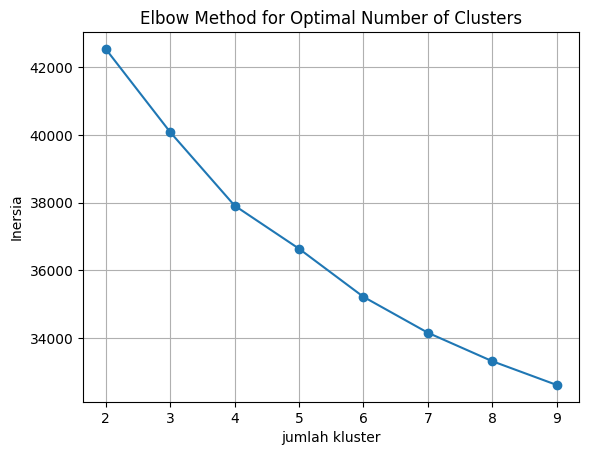

In [ ]:
numerical_columns = data_encoded.drop(['anime_id'], axis=1)

inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_columns)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('jumlah kluster')
plt.ylabel('Inersia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Pada elbow method kita bisa melihat dari nilai yang paling patah untuk menentukan jumlah klasternya, pada gambar diatas patahan berada di 4 artinya n cluster terbaik adalah n = 4 untuk membuat model KMeans

#### Model Fitting

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

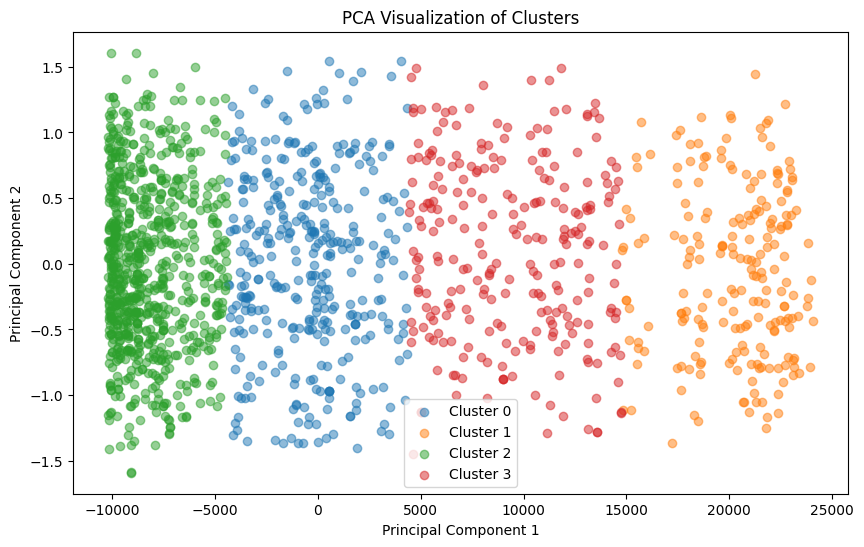

In [ ]:
#  Reduksi dimensi data dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.drop(['cluster'], axis=1))

# Gabungkan label kluster dengan komponen utama
cluster_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
cluster_df['cluster'] = train_cluster_labels

# Visualisasi
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(cluster_df.loc[cluster_df['cluster'] == cluster, 'PC1'],
                cluster_df.loc[cluster_df['cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.legend()
plt.show()

Ini adalah visualisasi hasil reduksi dimensi menggunakan PCA dan pengelompokan data berdasarkan klaster. Setiap titik merepresentasikan sampel dalam ruang dua dimensi, diwarnai sesuai dengan klaster yang ditentukan oleh model K-Means sebelumnya. Plot membantu memvisualisasikan pola klaster dalam ruang dua dimensi dengan menggunakan PCA.

###**Agglomerative Hierarchy**

####Menampilkan Shilhouette Score untuk menentukan klaster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.14684423755250828
For n_clusters = 3 The average silhouette_score is : 0.07981548459516172


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.07981274336369362
For n_clusters = 5 The average silhouette_score is : 0.07111878766207323
For n_clusters = 6 The average silhouette_score is : 0.0534967459823914


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.04631420558388179
For n_clusters = 8 The average silhouette_score is : 0.05123476409496078


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.05548764900184256
For n_clusters = 10 The average silhouette_score is : 0.05339708943304846


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


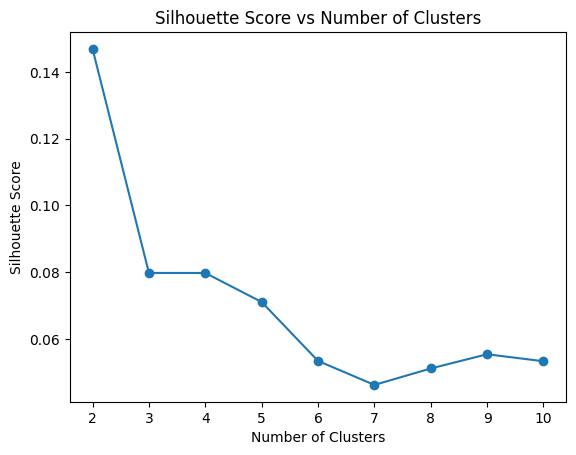

In [ ]:
X_train_numeric = X_train.drop('anime_id', axis=1)

silhouette_scores = []
for n_clusters in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = hc.fit_predict(X_train_numeric)
    silhouette_avg = silhouette_score(X_train_numeric, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

Pada Silhoutte Score kita dapat menentukan jumlah klusternya dari nilai tertinggi, pada gambar nilai tertinggi berada di 2 yang berarti nanti kita akan membuat n = 2 untuk dijadikan klaster

##### Model Fitting

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(X_train)

AgglomerativeClustering()

##### Menguji model

In [ ]:
agglomerative_labels = agglomerative.fit_predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


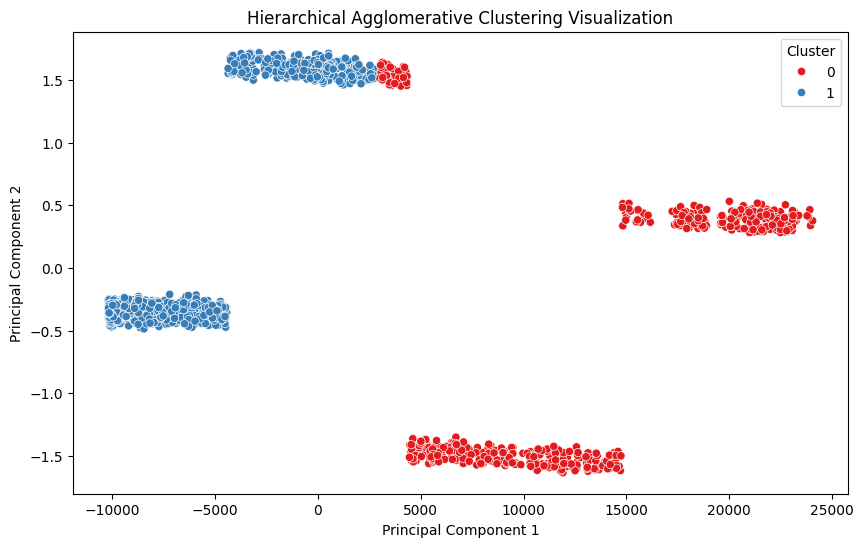

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=cluster_labels, palette='Set1', legend='full')
plt.title('Hierarchical Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Output di atas adalah visualisasi hasil Hierarchical Agglomerative Clustering (HAC) dengan dua klaster. Setiap titik pada plot mewakili satu sampel, diwarnai sesuai dengan klaster yang ditetapkan oleh algoritma HAC. Ini membantu memvisualisasikan pemisahan klaster dalam ruang dua dimensi.

# Evaluation

###Tuning Hypeprmeter

Tuning hyperparameter adalah proses mencari kombinasi nilai yang optimal untuk hyperparameter suatu model. Pada tahap modelling diatas kita sudah melihat nilai optimal berdasarkan elbow method untuk model KMeans dan berdasarkan silhouette score untuk model agglomerative

#### K-Means Evaluation

In [ ]:
# Evaluasi kinerja model menggunakan silhouette score
silhouette_avg = silhouette_score(X_test, test_cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Evaluasi menggunakan Calinski Harabasz Score
calinski_harabasz = calinski_harabasz_score(X_test, test_cluster_labels)
print("Calinski Harabasz Score:", calinski_harabasz)

# Evaluasi menggunakan Davies Bouldin Score
davies_bouldin = davies_bouldin_score(X_test, test_cluster_labels)
print("Davies Bouldin Score:", davies_bouldin)

Silhouette Score: 0.652228438196658
Calinski Harabasz Score: 2890.4158056016995
Davies Bouldin Score: 0.45086543228700904


#### Agglomerative Evaluation

In [ ]:
silhouette_avg_agglomerative = silhouette_score(X_test, agglomerative_labels)
print("Silhouette Score (Agglomerative):", silhouette_avg_agglomerative)

calinski_harabasz_agglomerative = calinski_harabasz_score(X_test, agglomerative_labels)
print("Calinski Harabasz Score (Agglomerative):", calinski_harabasz_agglomerative)

davies_bouldin_agglomerative = davies_bouldin_score(X_test, agglomerative_labels)
print("Davies Bouldin Score (Agglomerative):", davies_bouldin_agglomerative)

Silhouette Score (Agglomerative): 0.7104803910778412
Calinski Harabasz Score (Agglomerative): 1491.5330144118113
Davies Bouldin Score (Agglomerative): 0.4356872470219228


###Review Process

####Cross Validation

Disini kita melakukan Cross Valiudation untuk membandingkan hasil matriks evaluasi dari kedua algoritma yakni K-Means dan Agglomerative lalu kita lihat manakah algoritma yang menghasilkan matriks evaluasi yang paling optimal

In [ ]:
evaluation_results = pd.DataFrame(columns=['Metric', 'K-Means', 'Agglomerative'])

evaluation_results = evaluation_results.append({'Metric': 'Silhouette Score', 'K-Means': silhouette_avg, 'Agglomerative': silhouette_avg_agglomerative}, ignore_index=True)
evaluation_results = evaluation_results.append({'Metric': 'Calinski Harabasz Score', 'K-Means': calinski_harabasz, 'Agglomerative': calinski_harabasz_agglomerative}, ignore_index=True)
evaluation_results = evaluation_results.append({'Metric': 'Davies Bouldin Score', 'K-Means': davies_bouldin, 'Agglomerative': davies_bouldin_agglomerative}, ignore_index=True)

<ipython-input-107-c1f1760335a0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Metric': 'Silhouette Score', 'K-Means': silhouette_avg, 'Agglomerative': silhouette_avg_agglomerative}, ignore_index=True)
<ipython-input-107-c1f1760335a0>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Metric': 'Calinski Harabasz Score', 'K-Means': calinski_harabasz, 'Agglomerative': calinski_harabasz_agglomerative}, ignore_index=True)
<ipython-input-107-c1f1760335a0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append({'Metric': 'Davies Bouldin Score', 'K-Means': davies_bouldin, 'Agglomerative': davi

In [ ]:
evaluation_results

,Metric,K-Means,Agglomerative
0,Silhouette Score,0.053397,0.710480
1,Calinski Harabasz Score,2890.415806,1491.533014
2,Davies Bouldin Score,0.450865,0.435687


Berdasarkan matriks evaluasi dapat dilihat nilai Silhoutte score dan Davies Bouldin dari Agglomerative lebih tinggi dibandingkan K-Means serta nilai Calinski dari Agglomerative juga lebih rendah dibandingkan K-Means sehingga dapat disimpulkan bahwa Agglomerative lebih optimal dibandingkan K-Means

###Determain Next Steps

Berdasarkan matriks evaluasi, Agglomerative Clustering menunjukkan kinerja yang lebih unggul dibandingkan K-Means. Nilai Silhouette Score dan Davies Bouldin Score yang lebih tinggi pada Agglomerative Clustering menandakan bahwa model tersebut memiliki pemisahan klaster yang lebih baik dan klaster yang lebih jelas. Meskipun K-Means memiliki nilai Calinski Harabasz Score yang lebih tinggi, hal ini tidak cukup untuk mengimbangi keunggulan Agglomerative Clustering dalam aspek lainnya. Oleh karena itu, Agglomerative Clustering dapat dipilih sebagai model terbaik untuk kasus ini. Dengan demikian, model yang dihasilkan cukup baik dalam konteks ini. Oleh karena itu, tidak perlu kembali ke tahap sebelumnya untuk penyesuaian lebih lanjut.